In [1]:
import pandas as pd
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
metadata_path = '../../data/metadata/'
sim_data_path = '../../data/unigram/'
master_path = '../../data/master_tables'

In [3]:
agg_path = '../../data/agg_unigram/'

In [4]:
# fandom_list = [line.strip() for line in open('../../data/fandom_filtered_list')]

In [5]:
fandom_list = [i for i in os.listdir(agg_path) if 'tsv' in i]

In [6]:
fandom_list

['arthurian_mythology_&_related_fandoms_agg_cos.tsv',
 'attack_on_titan_agg_cos.tsv',
 'bishoujo_senshi_sailor_moon_agg_cos.tsv',
 'buffy_the_vampire_slayer_agg_cos.tsv',
 'dcu_agg_cos.tsv',
 'doctor_who_&_related_fandoms_agg_cos.tsv',
 'dragon_age_all_media_types_agg_cos.tsv',
 'haikyuu_agg_cos.tsv',
 'hamilton_miranda_agg_cos.tsv',
 'harry_potter_agg_cos.tsv',
 'hetalia_axis_powers_agg_cos.tsv',
 'homestuck_agg_cos.tsv',
 'kuroko_no_basuke_agg_cos.tsv',
 'les_miserables_all_media_types_agg_cos.tsv',
 'marvel_agg_cos.tsv',
 'ms_paint_adventures_agg_cos.tsv',
 'naruto_agg_cos.tsv',
 'one_direction_agg_cos.tsv',
 'shakespare_william_works_agg_cos.tsv',
 'sherlock_holmes_&_related_fandoms_agg_cos.tsv',
 'star_wars_all_media_types_agg_cos.tsv',
 'supernatural_agg_cos.tsv',
 'the_avengers_all_media_types_agg_cos.tsv',
 'the_walking_dead_&_related_fandoms_agg_cos.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_agg_cos.tsv']

In [7]:
df = pd.read_csv(os.path.join(agg_path,'arthurian_mythology_&_related_fandoms'+'_agg_cos.tsv'), sep = '\t')

In [8]:
df.head(2)

,Author,Hits,Kudos,Title,Words,Bookmarks,CompleteDate,Chapters,UpdateDate,PublishDate,Comments,completed_in_days,Cos
0,CaptainJacq,10372.0,279.0,Graphite Rain: A Love Story in Twelve Parts,144443.0,1188,1547.0,144,NaN,1547,66,0.0,0.016928
1,Afterstory,352.0,15.0,All the King\'s Virtues,49627.0,56,NaN,64,461.0,634,6,NaN,0.016305


In [9]:
df.columns.values

array(['Author', 'Hits', 'Kudos', 'Title', 'Words', 'Bookmarks',
       'CompleteDate', 'Chapters', 'UpdateDate', 'PublishDate', 'Comments',
       'completed_in_days', 'Cos'], dtype=object)

In [10]:
def create_df(fname):
    ### Create table: merge the one with JSD and the master table w/ old KL
    ### Only keep the numeric variables
    df = pd.read_csv(os.path.join(agg_path,fname), sep = '\t')
    df['Cosine_distance'] = df['Cos']
    df = df[['Hits', 'Kudos', 'Words', 'Bookmarks', 'Comments', 'Chapters', 'PublishDate', 'Cosine_distance']]
#     df = df.fillna(0)
    return df

In [29]:
df_all = []
for fandom in fandom_list:
    # for some we don't have the master table.
    df_all.append(create_df(fandom))
    print ('did: ', fandom)

df_all = pd.concat(df_all)

did:  arthurian_mythology_&_related_fandoms_agg_cos.tsv
did:  attack_on_titan_agg_cos.tsv
did:  bishoujo_senshi_sailor_moon_agg_cos.tsv
did:  buffy_the_vampire_slayer_agg_cos.tsv
did:  dcu_agg_cos.tsv
did:  doctor_who_&_related_fandoms_agg_cos.tsv
did:  dragon_age_all_media_types_agg_cos.tsv
did:  haikyuu_agg_cos.tsv
did:  hamilton_miranda_agg_cos.tsv
did:  harry_potter_agg_cos.tsv
did:  hetalia_axis_powers_agg_cos.tsv
did:  homestuck_agg_cos.tsv
did:  kuroko_no_basuke_agg_cos.tsv
did:  les_miserables_all_media_types_agg_cos.tsv
did:  marvel_agg_cos.tsv
did:  ms_paint_adventures_agg_cos.tsv
did:  naruto_agg_cos.tsv
did:  one_direction_agg_cos.tsv
did:  shakespare_william_works_agg_cos.tsv
did:  sherlock_holmes_&_related_fandoms_agg_cos.tsv
did:  star_wars_all_media_types_agg_cos.tsv
did:  supernatural_agg_cos.tsv
did:  the_avengers_all_media_types_agg_cos.tsv
did:  the_walking_dead_&_related_fandoms_agg_cos.tsv
did:  tolkien_j_r_r_works_&_related_fandoms_agg_cos.tsv


In [30]:
len(df_all)

22045

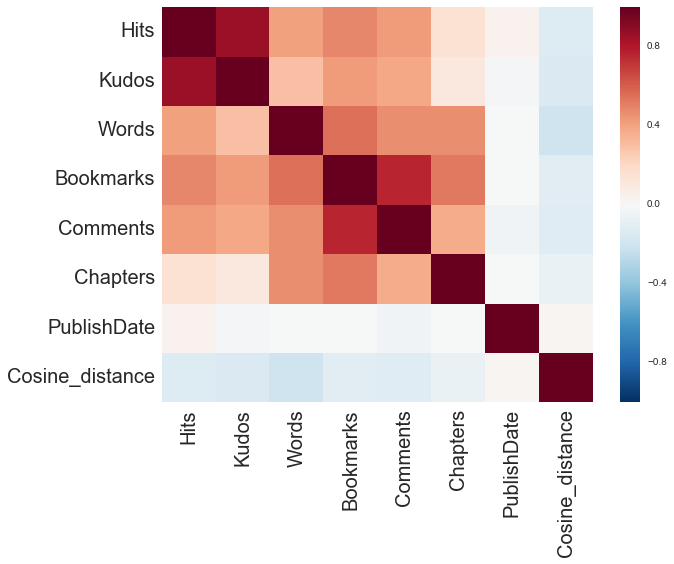

In [44]:
# plt.matshow(df.corr())
plt.figure(figsize = (10,8))
sns.heatmap(df_all.astype(float).corr())
plt.yticks(fontsize = 20) 
plt.xticks(rotation=90, fontsize = 20) 
plt.tight_layout()
plt.savefig('corr_heatmap_agg_1000.pdf', format='pdf')


In [14]:
df_all = df_all.astype(int)
# for col in df_all.columns.values:
#     df_all[col] = (df_all[col] - df_all[col].mean())/df_all[col].std(ddof=0)

In [15]:
df_all = df_all.fillna(0.001)

In [16]:
set(df_all.Kudos.tolist())

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [43]:
df_all.to_csv('regression_data.csv', index=False)

In [18]:
# df_all = df_all.dropna(how='any')

In [19]:
exog = df_all[['Hits', 'Words', 'Bookmarks', 'Comments', 'Chapters', 'PublishDate', 'Cosine_distance']].astype(float).as_matrix()
endog = df_all['Kudos'].astype(float).as_matrix()
mod_nbin = sm.NegativeBinomial(endog, exog)
res_nbin = mod_nbin.fit()
print(res_nbin.summary())

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                22045
Model:               NegativeBinomial   Df Residuals:                    22039
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Sep 2017   Pseudo R-squ.:                     nan
Time:                        13:34:22   Log-Likelihood:                    nan
converged:                      False   LL-Null:                   -1.1972e+05
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1                nan        nan        nan        nan           nan       nan
x2                nan        nan        nan        nan           nan       nan
x3                nan        nan        nan        n

In [20]:
df_all.head(2)

,Hits,Kudos,Words,Bookmarks,Comments,Chapters,PublishDate,Cosine_distance
0,10372,279,144443,1188,66,144,1547,0
1,352,15,49627,56,6,64,634,0


In [21]:
df_all.sort('Chapters',ascending=False).head()

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Hits,Kudos,Words,Bookmarks,Comments,Chapters,PublishDate,Cosine_distance
779,9210,119,764667,6192,78,30276,2289,0
287,8913,161,114439,3520,114,25600,682,0
121,19387,832,294072,14196,1718,24336,818,0
310,4603,134,15000,1350,87,22500,1040,0
894,26955,1210,131283,10703,147,19321,1234,0


In [22]:
df_all.columns.values

array(['Hits', 'Kudos', 'Words', 'Bookmarks', 'Comments', 'Chapters',
       'PublishDate', 'Cosine_distance'], dtype=object)

In [23]:
set(df_all.Kudos.tolist())

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [24]:
np.log(2)

0.69314718055994529

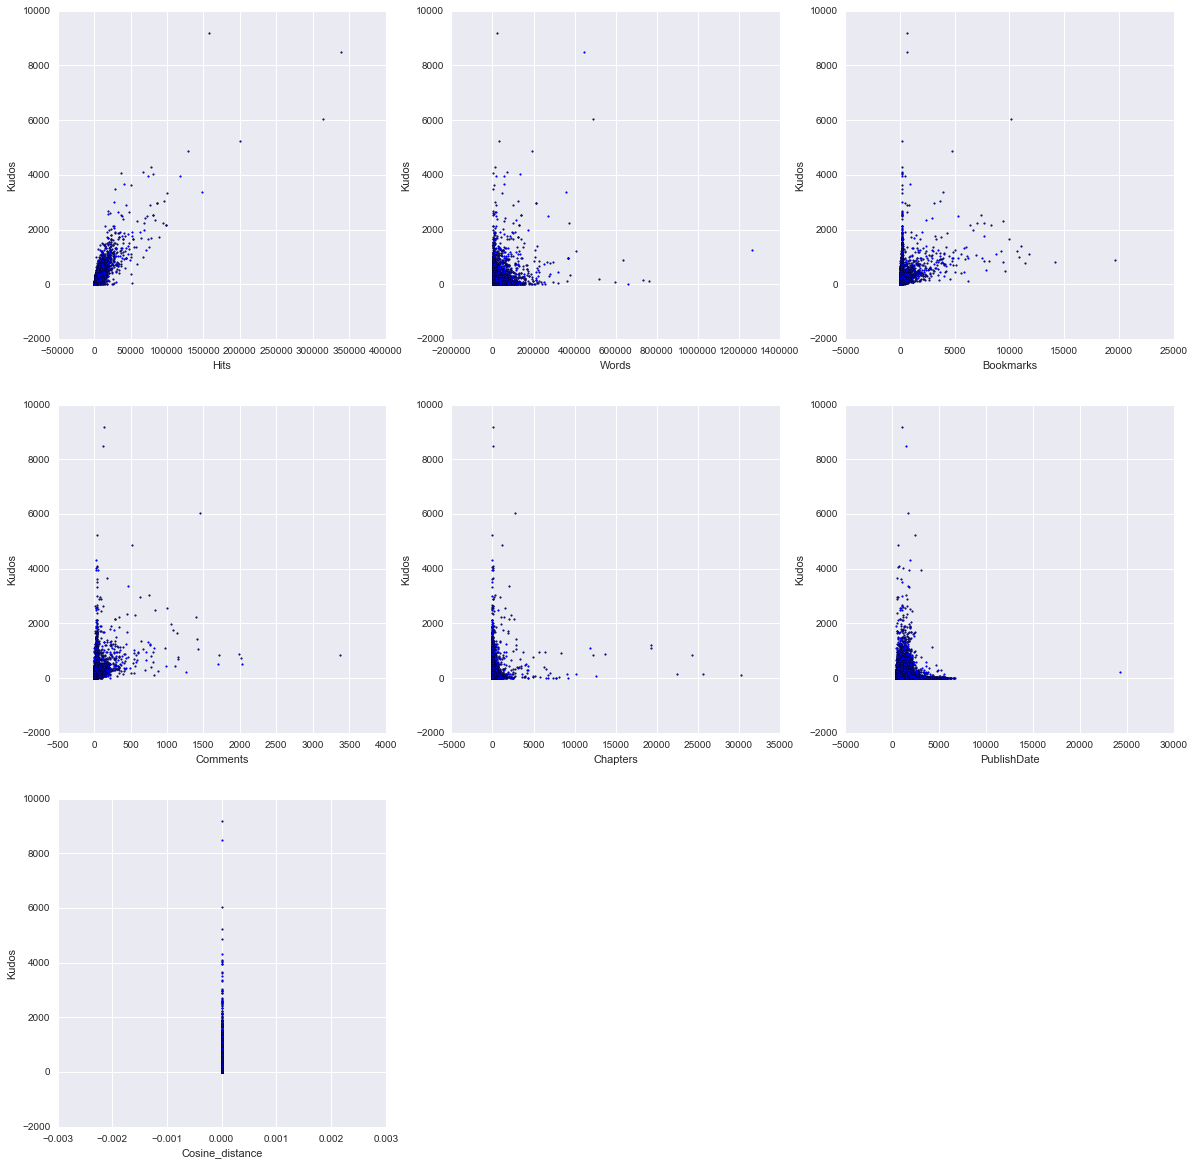

In [25]:
plt.figure(figsize=(20,20))
for i, field in enumerate(['Hits', 'Words', 'Bookmarks', 'Comments', 'Chapters','PublishDate', 'Cosine_distance']):
    plt.subplot(3, 3, i+1)
    plt.scatter(df_all[field], df_all['Kudos'],s=3)
    plt.xlabel(field)
#     plt.title(field)
    plt.ylabel('Kudos')
plt.savefig('fields_against_kudos.png',type='png')